# Homework 3: Table Manipulation and Visualization

**Reading**: 
* [Visualization](https://www.inferentialthinking.com/chapters/07/visualization.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 3 is due Wednesday, 9/18 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw03.ok')
_ = ok.auth(inline=True)

Assignment: Homework 3: Table Manipulation and Visualization
OK, version v1.14.15

Successfully logged in as rga2uz@virginia.edu


## Differences between Universities

**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year).
* The average Yelp review of nearby Thai restaurants.
* The USA Today ranking of the Medical school.
* The USA Today ranking of the Engineering school.

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for UVa and Virginia Tech.  Compute the dissimilarity (according to the above technique) between UVa and Tech.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise.

In [3]:
uva = Table.read_table("uva.csv").column("Trait value")
tech = Table.read_table("tech.csv").column("Trait value")

dissimilarity = sum(abs(uva-tech))
dissimilarity

14060.558701067917

In [4]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

The disimilarity is the total of the differences in their traits; we want the abosulte value of the differences because some may be negative. For example, if the difference between one trait of two schools was positive, and the difference between the second trait for two schools was negative, summing those two differences without taking the absolute value would make the schools seem more similar than they actually are.

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by $\$900$, but are otherwise identical, get a dissimilarity of $900$.  But two schools that differ in graduation rate by $0.9$ (a huge difference!), but are otherwise identical, get a dissimilarity of only $0.9$.

One way to fix this problem is to assign different "weights" to different traits. For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by $.001$, so that a difference of $\$900$ in the attendance cost results in a dissimilarity of $\$900 \times .001$, or $0.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. Now multiply that absolute value by a trait-specific number, like $.001$ or $2$.
4. Now, sum the 1000 resulting numbers.

**Question 3.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between UVa and Virginia Tech.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [5]:
weights = Table.read_table("weights.csv").column("Weight")

revised_dissimilarity = sum((abs(tech-uva))*weights)
revised_dissimilarity

505.98313211458805

In [6]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [7]:
unemployment = Table.read_table("unemployment.csv")
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [8]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [9]:
by_nei = unemployment.sort("NEI", descending = True)
by_nei_pter = unemployment.sort("NEI-PTER", descending = True)
by_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [10]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [33]:
greatest_nei = by_nei.take(np.arange(0,10))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [34]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [35]:
pter = unemployment.column("NEI-PTER") - unemployment.column("NEI")
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

In [36]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [37]:
by_pter = unemployment.with_columns("PTER", pter).sort("PTER", descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [38]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Create a line plot of the PTER over time. To do this, first add the `year` array and the `pter` array to the `unemployment` table; label these columns "Year" and "PTER", respectively. Then, generate a line plot using one of the table methods you've learned in class. Assign this new table to `pter_over_time`.

**Note:** If you're failing the test, but your plot looks correct, make sure that in your `unemployment` table, the "Year" column comes before the "PTER" column.

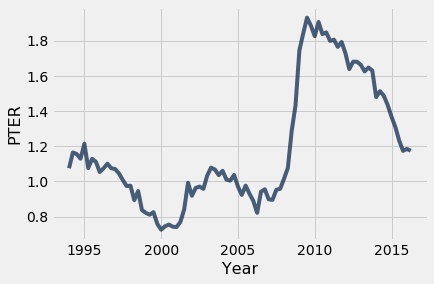

In [39]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns("Year", year, "PTER", pter)
pter_over_time.plot("Year", "PTER")

In [40]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

In [41]:
highPTER = True

In [42]:
_ = ok.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, go [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)! As of February 2017, no descriptions were posted for 2010 - 2016.

In [43]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** What year corresponds to the start of the time period?

In [48]:
us_birth_rate = sum(pop.column("BIRTHS")) / sum(pop.column("2015"))
us_birth_rate

0.012358536498646102

In [49]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*. We have first created a new version of the `pop` table, called `growth_rates`, which includes a column with the growth rate of each state. Making intermediate tables can improve the readability of the code and make it easier to follow when revisting at a later time.

In [50]:
growth_rates = pop.with_column('Growth Rate', (pop.column(3) / pop.column(2)) - 1)
fastest_growth = growth_rates.sort("Growth Rate", descending = True).take(np.arange(0,5)).column("NAME")
fastest_growth

array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'], dtype='<U20')

In [51]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [52]:
migration_table = pop.with_columns("Migration Rate", abs(pop.column("MIGRATION"))/pop.column("2015")).sort("Migration Rate", descending = True)
migration_table.show()
migration_rates = migration_table.where("Migration Rate", are.above(.01))
migration_rates.show()
movers = len(migration_rates.column("NAME"))
movers

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,Migration Rate
X,Puerto Rico,"3,473,181","3,411,307","30,991","28,108","-64,757",0,0.0186449
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231",0.0161021
4,Nevada,"2,883,758","2,940,058","36,462","23,771","41,967","1,642",0.0145529
4,Oregon,"4,024,634","4,093,465","46,198","35,371","56,972","1,032",0.0141558
4,Washington,"7,160,290","7,288,000","89,982","55,979","91,981","1,726",0.012846
4,Idaho,"1,652,828","1,683,140","22,792","12,496","18,869","1,147",0.0114162
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461",0.0112071
4,Colorado,"5,448,819","5,540,545","67,453","37,121","60,773",621,0.0111534
3,South Carolina,"4,894,834","4,961,119","57,926","47,514","52,844","3,029",0.0107959
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77,0.00953493


REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER,Migration Rate
X,Puerto Rico,"3,473,181","3,411,307","30,991","28,108","-64,757",0,0.0186449
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231",0.0161021
4,Nevada,"2,883,758","2,940,058","36,462","23,771","41,967","1,642",0.0145529
4,Oregon,"4,024,634","4,093,465","46,198","35,371","56,972","1,032",0.0141558
4,Washington,"7,160,290","7,288,000","89,982","55,979","91,981","1,726",0.012846
4,Idaho,"1,652,828","1,683,140","22,792","12,496","18,869","1,147",0.0114162
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461",0.0112071
4,Colorado,"5,448,819","5,540,545","67,453","37,121","60,773",621,0.0111534
3,South Carolina,"4,894,834","4,961,119","57,926","47,514","52,844","3,029",0.0107959


9

In [53]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column.

In [54]:
west_births = sum(pop.where("REGION", are.equal_to("4")).column("BIRTHS"))
west_births

979657

In [55]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

In [61]:
less_than_west_births = pop.where("2016", are.below(west_births))
less_than_west_births = less_than_west_births.num_rows
less_than_west_births

7

In [62]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

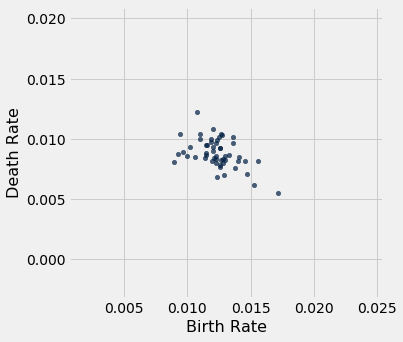

In [32]:
birth_rate = pop.column("BIRTHS") / pop.column("2015")
death_rate = pop.column("DEATHS") / pop.column("2015")
table_with_rates = pop.with_columns("Birth Rate", birth_rate, "Death Rate", death_rate).sort("Death Rate", descending = True)
#table_with_rates.show()
rate_plot = table_with_rates.scatter("Birth Rate", "Death Rate")

**Question 7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. 

In [63]:
assoc = True

In [64]:
_ = ok.grade('q3_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following histograms to the code that produced them. Explain your reasoning.

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Line 1:** `t.hist('x')`

**Histogram for Line 1:**

Also, make sure to assign a text response to the variable below. Example:


`line_one_histogram = "this is my explanation"`

In [121]:
# assign a text response to this
line_one_histogram = "Histogram B: there is no gap; x values in plot/ table consistently appear in the range of roughly -2.3 to 2.7; the tallest bar in the histogram is between -1 and 0, the range where most x values fall" 

**Line 2:** `t.hist('y')`

**Histogram for Line 2:**

Also, make sure to assign a text response to the variable below. Example:


`line_two_histogram = "this is my second explanation"`

In [122]:
line_two_histogram = "Histogram A: there is a gap in the hisogram because there are no y values in the plot/ graph in the range of roughly -0.5 to 0.5"

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [67]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw03.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/hw3/submissions/5QmOPx



In [68]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t